<a href="https://colab.research.google.com/github/Githubmany/Projects/blob/master/02_neural_network_classification_with_tensorflow_video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction to neural network classification with TensorFlow

In this notebook we are going to learn how to write neural networks for classification problems.

A classification is where you try to classify something as one thing or another.

A few types of classification problems:
* Binary classification
* Multiclass classification
* Multilabel classification


## Creating data to view and fit

In [1]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

# Check out features
X


array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [2]:
# Check the labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

Our data is a little hard to understand right now ... let us visualize it!


In [3]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:, 0], "X1":X[:, 1],"label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


In [4]:
circles["label"].value_counts()

label
1    500
0    500
Name: count, dtype: int64

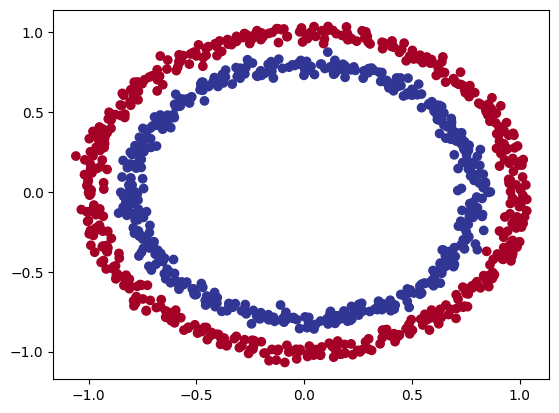

In [5]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

🛠 **Excercise:** Before pushing forward, spend 10-minutes playing around with playground.tensorflow.org building and running different neural networks. See what happens when you change different hyperparameters.

## Input and output shapes

In [6]:
# Check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [7]:
y[:10]      #  y has one output 1000 and outputs are scalars and have only one dimension.

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [8]:
# How many samples we are working with
len(X), len(y)

(1000, 1000)

In [9]:
# View the first example of features and labels
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in modelling

The steps in modelling with TensorFlow are typically:

1. Create  or import a model
2. Compile the model
3. Fit the model
4. Evaluate the model
5. Tweak
6. Evaluate ...



In [10]:
# Import TensorFlow
import tensorflow as tf
tf.__version__

'2.15.0'

In [11]:
# Set hte random seed
tf.random.set_seed(42)

# 1. Create the model using the Sequential API
model_1 = tf.keras.Sequential([
                               tf.keras.layers.Dense(1)
                               ])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# 3. Fit the model
model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 2s 8ms/step - loss: 4.2988 - accuracy: 0.4740
Epoch 2/5
32/32 [==============================] - 0s 9ms/step - loss: 2.9793 - accuracy: 0.4810
Epoch 3/5
32/32 [==============================] - 0s 8ms/step - loss: 0.7759 - accuracy: 0.4930
Epoch 4/5
32/32 [==============================] - 0s 5ms/step - loss: 0.7149 - accuracy: 0.4970
Epoch 5/5
32/32 [==============================] - 0s 8ms/step - loss: 0.7001 - accuracy: 0.4950


In [12]:
# Let us try and improve the model by training fro longer ....
model_1.fit(X, y, epochs=200, verbose=0)
model_1.evaluate(X, y)


32/32 [==============================] - 0s 1ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

Since we are working on a binary classification problem and our model is getting around ~50% accuracy... it is performing as required.

So let us step things up a nothch and add an extra layer.

In [13]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create a model, this time with two layers
model_2 = tf.keras.Sequential([
                               tf.keras.layers.Dense(1),
                               tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# 3. Fit the model
model_2.fit(X, y, epochs=100, verbose=0)

In [14]:
# 4. Evaluate the model
model_2.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000


[7.712474346160889, 0.5]

## Improving our model

Let us look into our bag of tricks and see how we can improve our model

1. Create a model - we might want to add more layers or increase the number of hidden units within a layer.
2. Compiling a model - here we might want to choose a different optimization function such as Adam instead of SGD.
3. Fitting a model - perhaps we might fit our model for more epochs (leave it training for longer).

In [15]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model (this time 3 layers)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),  # add 100 dense neurons
    tf.keras.layers.Dense(10),  # add another layer with 10 neurons
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# 3. Fit the model
model_3.fit(X, y, epochs=100, verbose=0)

In [16]:
# 4. Evaluate the model
model_3.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6958 - accuracy: 0.5070


[0.6958328485488892, 0.5070000290870667]

To visualize our model's predictions, let us create a function `plot_decision_boundary()`, this function will:

* Take in a trained model, features (X) and labels (y)
* Create a meshgrid of the different X values
* Make predictions across the meshgrid
* Plot the predictions as well as a line between zones (where each unique class falls)



313/313 [==============================] - 0s 1ms/step
doing binary classification


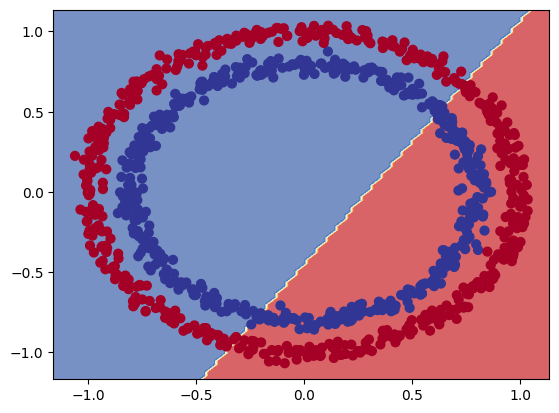

In [17]:
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary createdby a model predicting on X. This function was
  inspired by two resources:
    1. https://cs231n.github.io/neural-networks-case-study/
    2. https://github.com/madewithml/basic/blob/master/notebooks/09_multilayer_Perceptrons/09_TF_Multilayer_Perceptrons.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  X_min, X_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  XX, yy =np.meshgrid(np.linspace(X_min, X_max, 100),
                      np.linspace(y_min, y_max, 100))

  # Create X value (we are going to make predictions on these)
  X_in = np.c_[XX.ravel(), yy.ravel()] # Stack 2D arrays together

  # Make predictions
  y_pred = model.predict(X_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print("doing multiclass classification")
    # We have to reshape our prediction to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(XX.shape)
  else:
    print("doing binary classification")
    y_pred = np.round(y_pred).reshape(XX.shape)

    # Plot the decision boundary
    plt.contourf(XX, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(XX.min(), XX.max())
    plt.ylim(yy.min(), yy.max())

# Check out the predictions our model is making
plot_decision_boundary(model=model_3,
                       X=X,
                       y=y)

In [18]:
# Let's see if our model can be used for a regression problem ...
tf.random.set_seed(42)

# Create some regression data
X_regression = tf.range(0, 1000, 5)  # means X starts from 0 to 1000 as the range and 5 is the step
y_regression = tf.range(100, 1100, 5)  # y = X + 100

# Split our regression data into training and test sets
X_reg_train = X_regression[:150]  # :150 means the first 150 and 150: means the last 150
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# Fit the model to the regression data
model_3.fit(X_reg_train, y_reg_train, epochs=100)


Epoch 1/100


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 253, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential_2' (type Sequential).
    
    Input 0 of layer "dense_3" is incompatible with the layer: expected min_ndim=2, found ndim=1. Full shape received: (None,)
    
    Call arguments received by layer 'sequential_2' (type Sequential):
      • inputs=tf.Tensor(shape=(None,), dtype=int32)
      • training=True
      • mask=None


Oh wait ... we compiled our model for a binary classification problem.

But... we are now working on a regression problem, let us change the model to suit our data,



In [19]:
# Setup the random seed
tf.random.set_seed(42)

# 1. Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model, this time with a regression-specific loss function
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

# First reshape the input data
X_reg_train = tf.reshape(X_reg_train, (-1, 1))

# 3. Fit the model
model_3.fit(X_reg_train, y_reg_train, epochs=100)


Epoch 1/100
5/5 [==============================] - 1s 7ms/step - loss: 412.9985 - mae: 412.9985
Epoch 2/100
5/5 [==============================] - 0s 5ms/step - loss: 270.0529 - mae: 270.0529
Epoch 3/100
5/5 [==============================] - 0s 5ms/step - loss: 132.1817 - mae: 132.1817
Epoch 4/100
5/5 [==============================] - 0s 8ms/step - loss: 53.0106 - mae: 53.0106
Epoch 5/100
5/5 [==============================] - 0s 9ms/step - loss: 87.9939 - mae: 87.9939
Epoch 6/100
5/5 [==============================] - 0s 5ms/step - loss: 69.0360 - mae: 69.0360
Epoch 7/100
5/5 [==============================] - 0s 6ms/step - loss: 44.3915 - mae: 44.3915
Epoch 8/100
5/5 [==============================] - 0s 5ms/step - loss: 52.1251 - mae: 52.1251
Epoch 9/100
5/5 [==============================] - 0s 5ms/step - loss: 42.9035 - mae: 42.9035
Epoch 10/100
5/5 [==============================] - 0s 7ms/step - loss: 45.6269 - mae: 45.6269
Epoch 11/100
5/5 [==============================] - 0

2/2 [==============================] - 0s 6ms/step


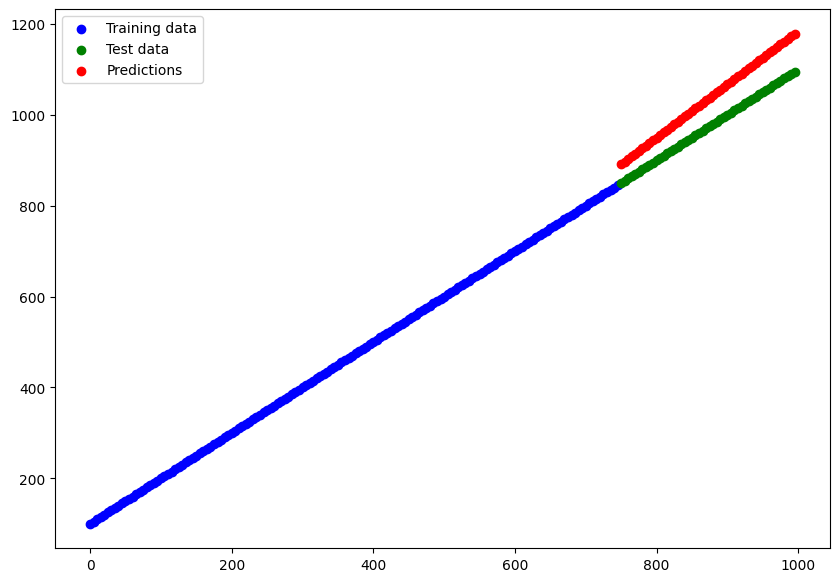

In [20]:
# Make predictions with our trained model
y_reg_preds = model_3.predict(X_reg_test)

# Plot the model's predictions against our regression data
plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c="b", label="Training data")
plt.scatter(X_reg_test, y_reg_test, c="g", label="Test data")
plt.scatter(X_reg_test, y_reg_preds, c="r", label="Predictions")
plt.legend();

## The missing piece: Non-linearity

In [21]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_4 =tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
])

# Compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

# 3. Fit the model
history = model_4.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 4.3244 - accuracy: 0.4500
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 4.3124 - accuracy: 0.4510
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 4.2979 - accuracy: 0.4550
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 4.2645 - accuracy: 0.4570
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 4.2224 - accuracy: 0.4580
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1818 - accuracy: 0.4600
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1620 - accuracy: 0.4610
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1279 - accuracy: 0.4620
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 4.0838 - accuracy: 0.4640
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 4.0330 - accuracy: 0.4670
Epoch 11/

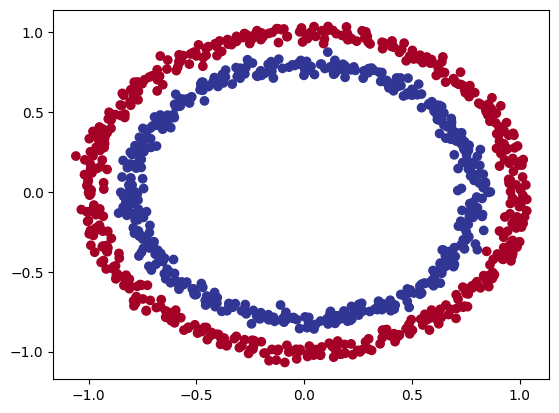

In [22]:
# Check out our data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

313/313 [==============================] - 0s 1ms/step
doing binary classification


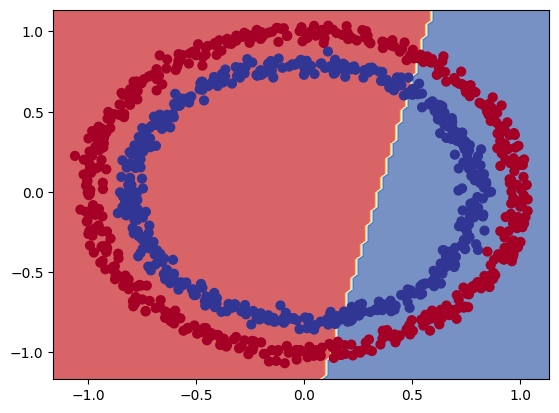

In [23]:
# Check the decision boundary for our latest model
plot_decision_boundary(model=model_4,
                       X=X,
                       y=y)

Let us try to build our first neural network with a non-linear activation

In [24]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create a model with a non-linear activation
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.relu)
])

# 2. Compile the model
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

# Fit the model
history = model_5.fit(X, y, epochs = 100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 6.1050 - accuracy: 0.4860
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 6.0992 - accuracy: 0.4880
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 6.0963 - accuracy: 0.4860
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 6.0764 - accuracy: 0.4860
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 6.0372 - accuracy: 0.4850
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 6.0346 - accuracy: 0.4850
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 6.0320 - accuracy: 0.4850
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 6.0300 - accuracy: 0.4860
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 6.0169 - accuracy: 0.4850
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 6.0094 - accuracy: 0.4860
Epoch 11/

In [25]:
# Time to replicate the multi-layer neural network from Tensorflow playground

#Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(6, activation="relu"),
    tf.keras.layers.Dense(6, activation="relu"),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_6.compile(loss = "binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

# 3. Fit the model
history = model_6.fit(X, y, epochs=250)

Epoch 1/250
32/32 [==============================] - 1s 2ms/step - loss: 4.4561 - accuracy: 0.5000
Epoch 2/250
32/32 [==============================] - 0s 2ms/step - loss: 3.9405 - accuracy: 0.5000
Epoch 3/250
32/32 [==============================] - 0s 2ms/step - loss: 3.7372 - accuracy: 0.5000
Epoch 4/250
32/32 [==============================] - 0s 2ms/step - loss: 3.7108 - accuracy: 0.4570
Epoch 5/250
32/32 [==============================] - 0s 2ms/step - loss: 3.6732 - accuracy: 0.4160
Epoch 6/250
32/32 [==============================] - 0s 2ms/step - loss: 3.6335 - accuracy: 0.4220
Epoch 7/250
32/32 [==============================] - 0s 2ms/step - loss: 3.4643 - accuracy: 0.4420
Epoch 8/250
32/32 [==============================] - 0s 2ms/step - loss: 3.2672 - accuracy: 0.4600
Epoch 9/250
32/32 [==============================] - 0s 2ms/step - loss: 3.1371 - accuracy: 0.4590
Epoch 10/250
32/32 [==============================] - 0s 2ms/step - loss: 2.8400 - accuracy: 0.4690
Epoch 11/

In [26]:
# Evaluate the model
model_6.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.0936 - accuracy: 0.9710


[0.0935891792178154, 0.9710000157356262]

313/313 [==============================] - 0s 1ms/step
doing binary classification


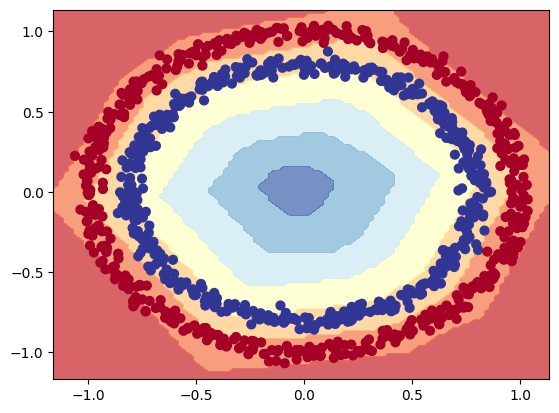

In [27]:
# How do our model predictions look?
plot_decision_boundary(model_6, X, y)

In [28]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(6, activation="relu"),
    tf.keras.layers.Dense(6, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compile the model
model_7.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

# 3. Fit the model
history = model_7.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 2s 2ms/step - loss: 0.6885 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6830 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6796 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6773 - accuracy: 0.5030
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6754 - accuracy: 0.5250
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6736 - accuracy: 0.5250
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6714 - accuracy: 0.5730
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6692 - accuracy: 0.5890
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6663 - accuracy: 0.6360
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6634 - accuracy: 0.6250
Epoch 11/

In [29]:
# Evaluate our model
model_7.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.0676 - accuracy: 1.0000


[0.06760048866271973, 1.0]

313/313 [==============================] - 1s 2ms/step
doing binary classification


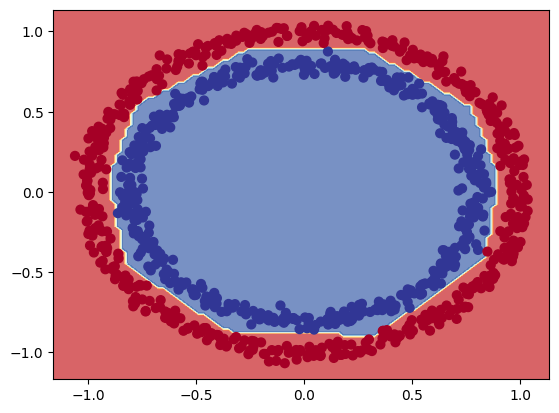

In [30]:
# Let us visualize our incredible metrics
plot_decision_boundary(model_7, X, y)

🤔 **Question:** What is wrong with the predictions we have made? Are we really evaluating our model correctly? Hint: what data did the model learn on and what data did we pridict on?

🔑 **Note:** The combination of **linear (straight lines) and non-linear
(non-straight lines) functions** is one of the key fundamentals of neural networks.

In [31]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(6, activation="relu"),
    tf.keras.layers.Dense(6, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compile the model
model_7.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

# 3. Fit the model
history = model_7.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 4ms/step - loss: 0.6993 - accuracy: 0.5020
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6969 - accuracy: 0.5020
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6951 - accuracy: 0.4980
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6938 - accuracy: 0.5050
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6925 - accuracy: 0.5060
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6915 - accuracy: 0.5010
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6903 - accuracy: 0.5060
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6896 - accuracy: 0.5060
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6887 - accuracy: 0.5100
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6881 - accuracy: 0.5080
Epoch 11/

In [32]:
# 4. Evaluate our model
model_7.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.1615 - accuracy: 1.0000


[0.1615106612443924, 1.0]

313/313 [==============================] - 1s 2ms/step
doing binary classification


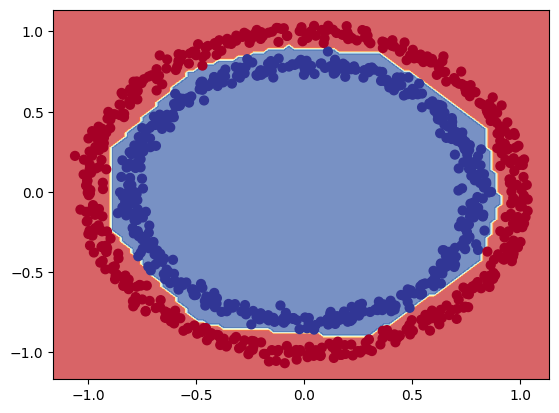

In [33]:
# Let us visualize our incredible metrics
plot_decision_boundary(model_7, X, y)

🤔 **Question:** What is wrong with the predictions we have made? Are we really evaluating our model correctly? Hint: what data did the model learn on?

🔑 **Note:** The combination of **linear (straight lines) and non-linear (non-straight lines) functions** is one of the key fundamentals of neural networks.

Now we have discussed the concept of linear and non-linear functions (or lines), let us see them in action.


In [34]:
# Create a toy tensor (similar to the data we pass into our models)
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

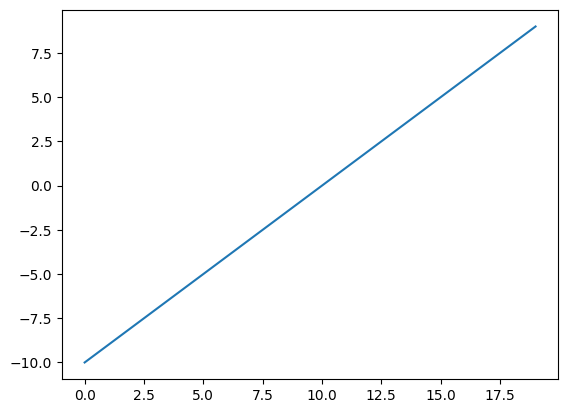

In [35]:
# Visualize our toy tensor
plt.plot(A);

In [36]:
# Let us start by replicating sigmoid - sigmoid(x) = 1/(1 + exp(-x))
def sigmoid(x):
  return 1/(1 + tf.exp(-x))

# Use the sigmoid function on our toy tensor
sigmoid(A)




<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

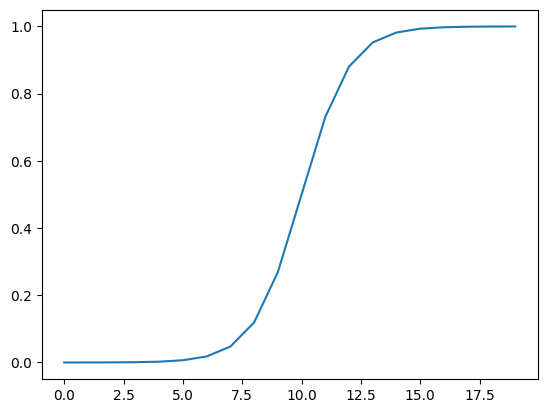

In [37]:
# Plot our toy tensor transformed by sigmoid
plt.plot(sigmoid(A));

In [38]:
# Let us recreate the relu function
def relu(x):
  return tf.maximum(0, x)  # means giving the maximum of 0 or the number itself. Is 0 > -1? It is so we set it to 0 (see A above)

# Pass our toy tensor to our custom relu function
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

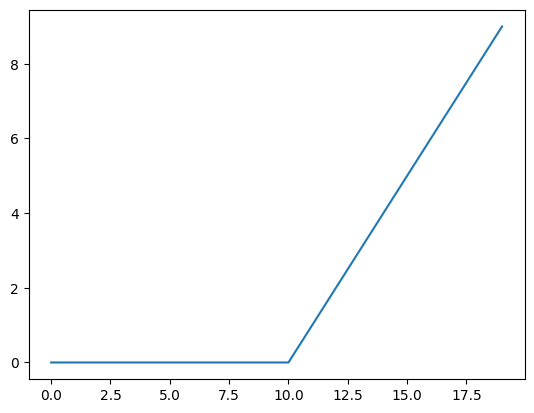

In [39]:
# Plot ReLU-modified tensor
plt.plot(relu(A));

In [40]:
# Let us try the linear activation function
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

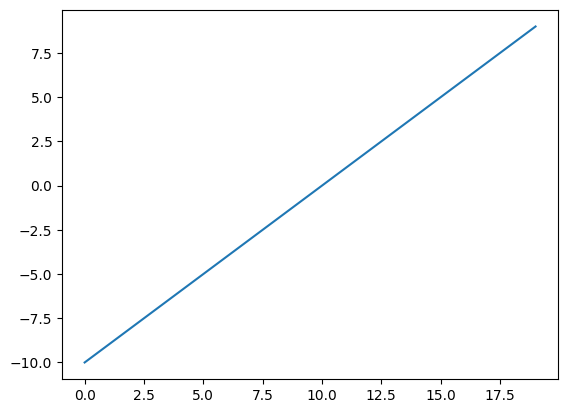

In [41]:
# Does the linear activation function change anything?
plt.plot(tf.keras.activations.linear(A));

In [42]:
# Does A even change?
A == tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

## Evaluating and improving our classification

So far we have been training and testing on the same dataset ...
However, in machine learning this is basically a sin.

So let us create a training and test set.



In [43]:
# Check how many examples we have
len(X)

1000

In [44]:
# Split into train and test sets
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [45]:
# Let us recreate a model to fit on the training data and evaluate on the test

# Set random seed
tf.random.set_seed(42)

# 1. Create the model (same as model_7)
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(6, activation="relu"),
    tf.keras.layers.Dense(6, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compile the model
model_8.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.01),
                metrics=["accuracy"])

# Fit the model
history = model_8.fit(X_train, y_train, epochs=(250))

Epoch 1/250
25/25 [==============================] - 1s 4ms/step - loss: 0.7199 - accuracy: 0.5013
Epoch 2/250
25/25 [==============================] - 0s 4ms/step - loss: 0.7106 - accuracy: 0.4875
Epoch 3/250
25/25 [==============================] - 0s 3ms/step - loss: 0.7053 - accuracy: 0.4625
Epoch 4/250
25/25 [==============================] - 0s 4ms/step - loss: 0.7018 - accuracy: 0.4350
Epoch 5/250
25/25 [==============================] - 0s 4ms/step - loss: 0.6997 - accuracy: 0.4050
Epoch 6/250
25/25 [==============================] - 0s 3ms/step - loss: 0.6979 - accuracy: 0.4425
Epoch 7/250
25/25 [==============================] - 0s 3ms/step - loss: 0.6966 - accuracy: 0.4425
Epoch 8/250
25/25 [==============================] - 0s 3ms/step - loss: 0.6958 - accuracy: 0.4212
Epoch 9/250
25/25 [==============================] - 0s 4ms/step - loss: 0.6948 - accuracy: 0.4675
Epoch 10/250
25/25 [==============================] - 0s 3ms/step - loss: 0.6940 - accuracy: 0.4988
Epoch 11/

In [46]:
# 4. Evaluate the model on the dataset
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0318 - accuracy: 1.0000


[0.031802237033843994, 1.0]

313/313 [==============================] - 1s 2ms/step
doing binary classification
313/313 [==============================] - 1s 2ms/step
doing binary classification


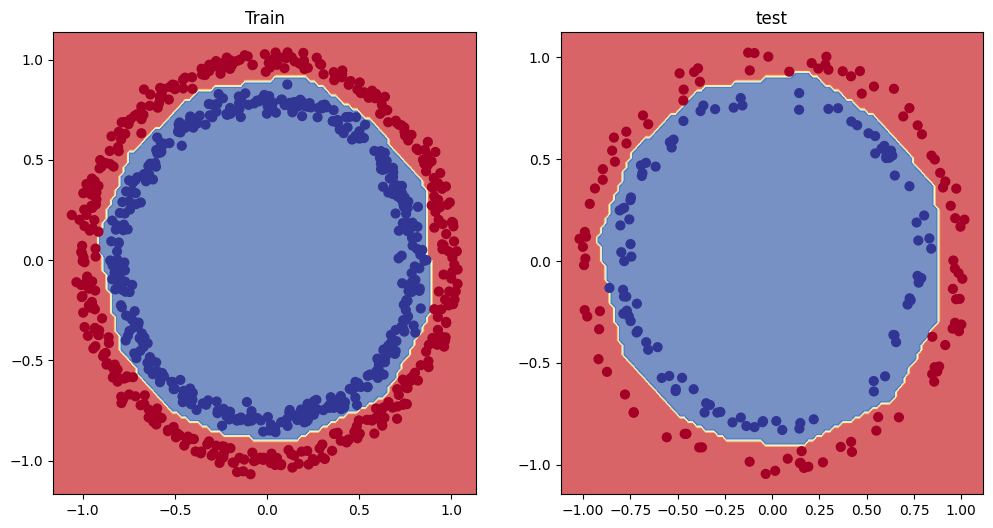

In [47]:
# Plot the decision boundary forthe training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_8, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("test")
plot_decision_boundary(model_8, X=X_test, y=y_test)
plt.show();

## Plot the loss (or training) curves

In [48]:
# Convert the history object into a DataFrame
pd.DataFrame(history.history)

,loss,accuracy
0,0.719894,0.50125
1,0.710630,0.48750
2,0.705266,0.46250
3,0.701848,0.43500
4,0.699747,0.40500
...,...,...
245,0.033208,1.00000
246,0.032845,1.00000
247,0.032549,1.00000
248,0.031939,1.00000


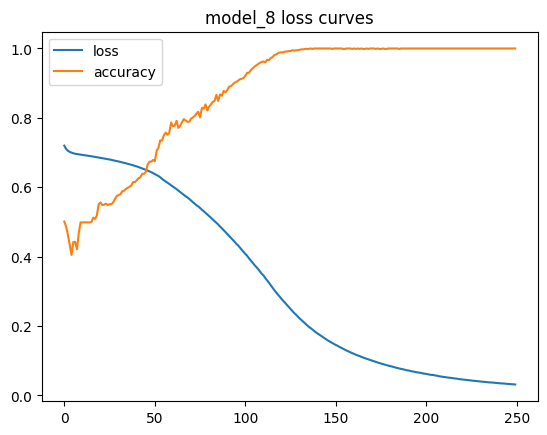

In [49]:
# Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("model_8 loss curves");

🔑 **Note:** For many problems, the loss function going down means the model is improving (predictions it is making are getting closer to the ground truth labels).

## Finding the best learning rate

To find the ideal learning rate (the learning rate where the loss decreases the most during training) we are going to use the following steps:
* A learning rate **callback** - you can think of a callback as an extra piece of functionality, you can add to your model *while* it is training.
* Another model (we could use the same as above, but we are practicing building models here)
* A modified loss curves plot.


In [50]:
# Set random seed
tf.random.set_seed(42)

# Create a model (same as model_8 above)
model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(6, activation="relu"),
    tf.keras.layers.Dense(6, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_9.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

# Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

In [51]:
# Fit the model (passing lr_scheduler callback)
history_9 = model_9.fit(X_train,
                        y_train,
                        epochs=100,
                        callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.7040 - accuracy: 0.4938 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7033 - accuracy: 0.4925 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7026 - accuracy: 0.4938 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7018 - accuracy: 0.4925 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7011 - accuracy: 0.4950 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7004 - accuracy: 0.4963 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6995 - accuracy: 0.4925 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6988 - accuracy: 0.4850 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 3ms/step - loss:

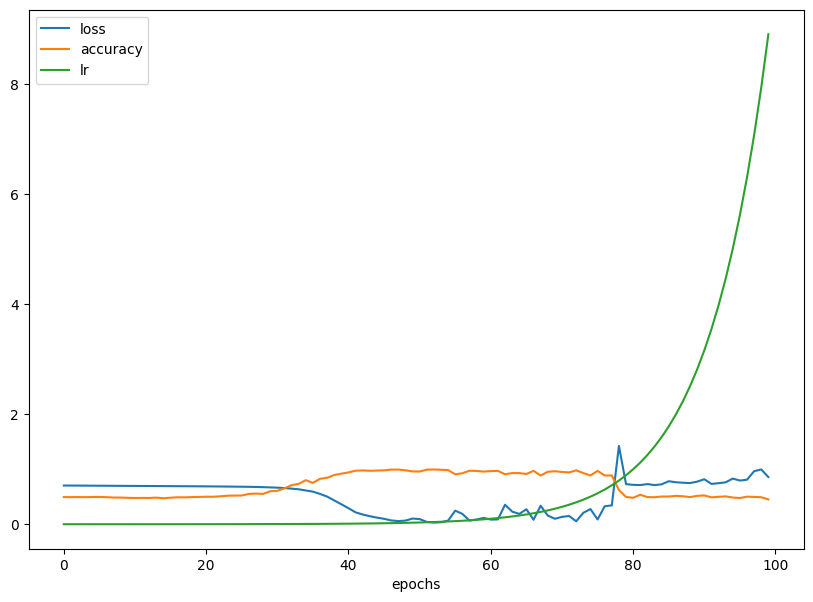

In [52]:
# Checkout the history
pd.DataFrame(history_9.history).plot(figsize=(10, 7), xlabel="epochs");


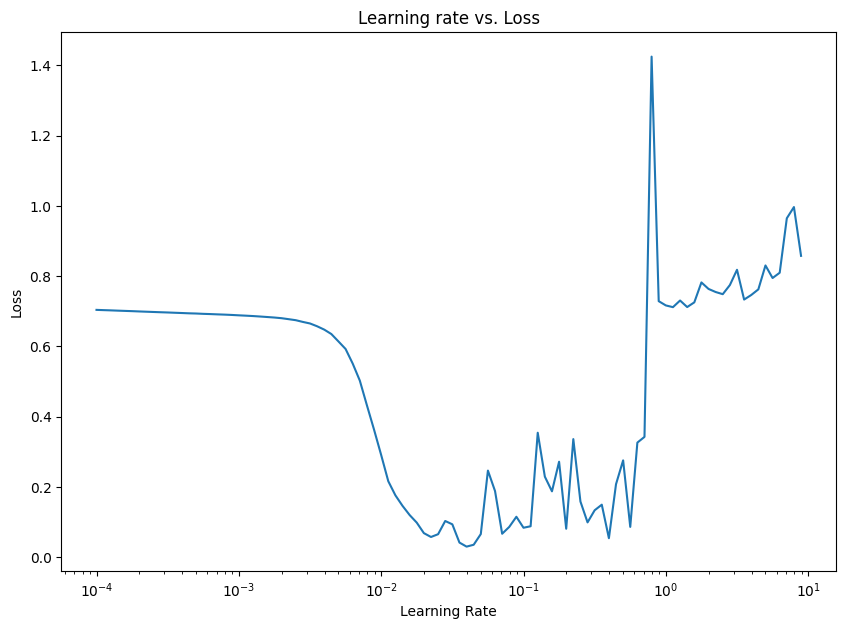

In [53]:
# Plot the learning rate versus the loss
lrs = 1e-4 * (10 ** (tf.range(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history_9.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. Loss");

In [54]:
len(lrs)

100

In [55]:
# Example of other typical learning rates values:
10**0, 10**-1, 10**-2, 10**-3, 1e-4

(1, 0.1, 0.01, 0.001, 0.0001)

In [56]:
# Learning rate we used before (model_8)
10**-2

0.01

In [57]:
# Let us try using a higher **ideal** learning rate with the same model as before.

# Set the random seed
tf.random.set_seed(42)

# Create the model
model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(6, activation="relu"),
    tf.keras.layers.Dense(6, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model with the ideal learning rate
model_10.compile(loss="binary_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(lr=0.02),
                 metrics=["accuracy"])

# Fit the model for 200 epochs (50 less than before)
history_10 = model_10.fit(X_train, y_train, epochs=200)



Epoch 1/200
25/25 [==============================] - 1s 3ms/step - loss: 0.6944 - accuracy: 0.4800
Epoch 2/200
25/25 [==============================] - 0s 3ms/step - loss: 0.6924 - accuracy: 0.4725
Epoch 3/200
25/25 [==============================] - 0s 3ms/step - loss: 0.6910 - accuracy: 0.4938
Epoch 4/200
25/25 [==============================] - 0s 10ms/step - loss: 0.6896 - accuracy: 0.4988
Epoch 5/200
25/25 [==============================] - 0s 6ms/step - loss: 0.6886 - accuracy: 0.5000
Epoch 6/200
25/25 [==============================] - 0s 10ms/step - loss: 0.6876 - accuracy: 0.4988
Epoch 7/200
25/25 [==============================] - 0s 8ms/step - loss: 0.6864 - accuracy: 0.4988
Epoch 8/200
25/25 [==============================] - 0s 4ms/step - loss: 0.6856 - accuracy: 0.4988
Epoch 9/200
25/25 [==============================] - 0s 7ms/step - loss: 0.6846 - accuracy: 0.5325
Epoch 10/200
25/25 [==============================] - 0s 6ms/step - loss: 0.6836 - accuracy: 0.5250
Epoch 1

In [58]:
# Evaluate model_10 on the test dataset
model_10.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0320 - accuracy: 0.9900


[0.03204165771603584, 0.9900000095367432]

In [59]:
# Evaluate model_8 on the test dataset
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0318 - accuracy: 1.0000


[0.031802237033843994, 1.0]

313/313 [==============================] - 0s 1ms/step
doing binary classification
313/313 [==============================] - 0s 1ms/step
doing binary classification


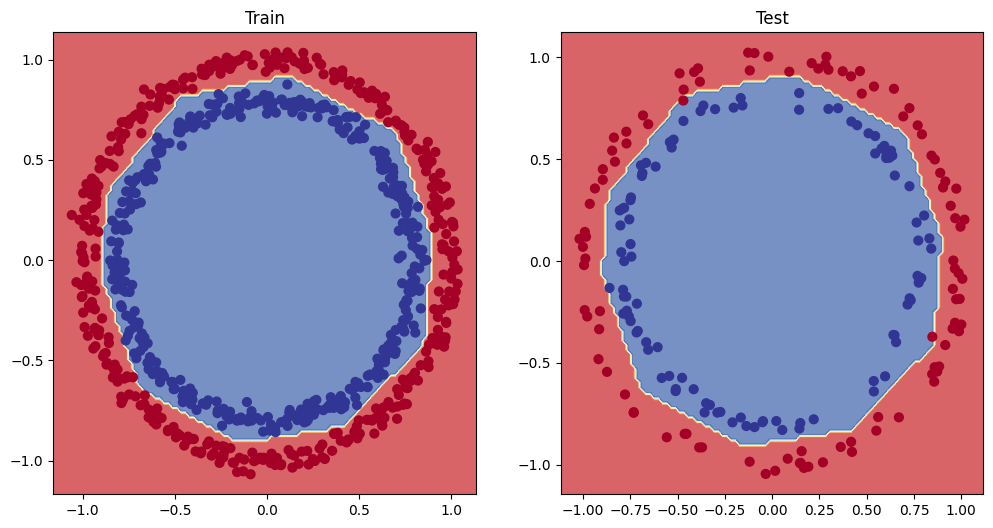

In [60]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # row 1, 2 columns, section 1
plt.title("Train")
plot_decision_boundary(model_10, X=X_train, y=y_train)
plt.subplot(1, 2, 2)  # row 1, 2 columns, section 2
plt.title("Test")
plot_decision_boundary(model_10, X=X_test, y=y_test)
plt.show()

## More classification evaluation methods

Alongside visualizing our models results as much as possible, there are a handful of other classification evaluation methods & metrics you should be familiar with:
* Accuracy
* Precision
* Recall
* F1-score
* Confusion matrix
* Classification report (from scikit-learn) - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html



In [61]:
# Check the accuracy of our model
loss, accuracy = model_10.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set {(accuracy*100):.2f}%")


7/7 [==============================] - 0s 2ms/step - loss: 0.0320 - accuracy: 0.9900
Model loss on the test set: 0.03204165771603584
Model accuracy on the test set 99.00%


How about a confusion matrix?



In [62]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix

# Make predictions
y_preds = model_10.predict(X_test)

# Create confusion matrix


7/7 [==============================] - 0s 3ms/step


In [63]:
y_test[:10]

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0])

In [64]:
y_preds[:10]

array([[0.99746996],
       [0.9984216 ],
       [0.980663  ],
       [0.9951114 ],
       [0.03046232],
       [0.00636498],
       [0.9082371 ],
       [0.00574824],
       [0.99206233],
       [0.00474747]], dtype=float32)

Oops ... looks like our predictions array has come out in **prediction probability** from.... the standard output from the sigmoid (or softmax) activation functions.

In [65]:
# Convert prediction probabilities to binary format and view the first 10
tf.round(y_preds)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [66]:
# Create a confusion matrix
confusion_matrix(y_test, tf.round(y_preds))

array([[99,  2],
       [ 0, 99]])

How about we prettify our confusion matrix?

**Note:** the confusion matrix code we are about to write is a mix of scikit-learn's plot_confusion_matrix. https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#confusion-matrix

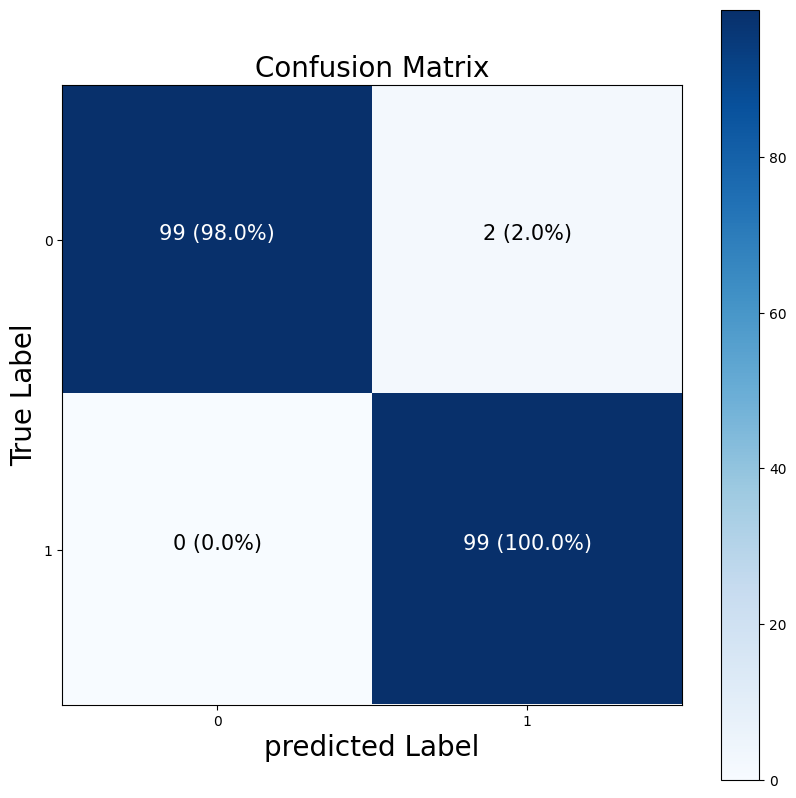

In [67]:
import itertools

figsize = (10, 10)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") /cm.sum(axis=1)[:, np.newaxis]  # normalize our confusion matrix
n_classes = cm.shape[0]

# Let's make it prettier
fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title="Confusion Matrix",
       xlabel="predicted Label",
       ylabel="True Label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2

# PLot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)




## Working with a larger example (multiclass classification

When you have more than two classes as an option, is is known as **multi-class classification**.
* This means if you have 3 different classes, it's multi-class classification.
* It also means if you have 100 different classes, it's multi-class classification.

To practice multi-class classification, we are going to build a neural network to classify images of different items of clothing.



In [68]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [69]:
# Show the first training example
print(f"TTraining sample:\n{train_data[0]}\n")
print(f"Training label:\n{train_labels[0]}\n")

TTraining sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1 

In [70]:
# Check the shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

The training label above is a scalar and has no shape (()).

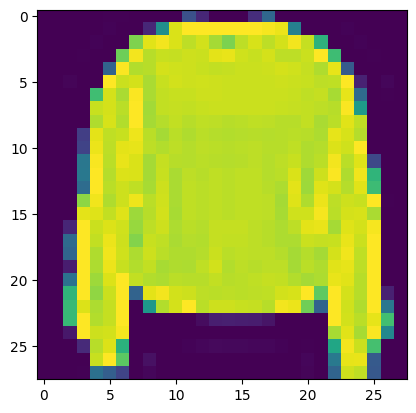

In [71]:
# Plot a single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[7]);

In [72]:
# Check out samples label
train_labels[7]

2

In [73]:
# Create a small list so we can index onto our training labels so they are human readable
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

len(class_names)

10

Text(0.5, 1.0, 'Dress')

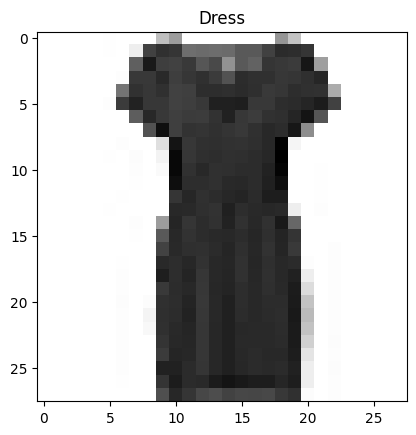

In [74]:
# Plot an example image and its label
index_of_choice = 20
plt.imshow(train_data[index_of_choice], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

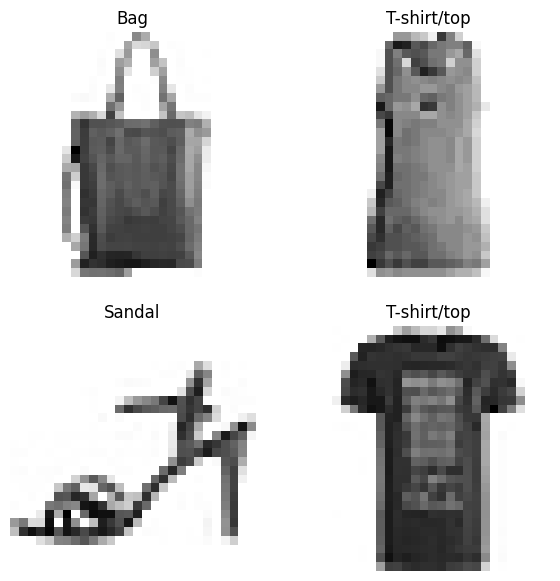

In [75]:
# Plot multiple random images of fashion MNIST
import random
plt.figure(figsize=(7, 7))
for i in range(4):
  ax = plt.subplot(2, 2, i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

Building a multi-class classification model

For our multi-class classification model, we can use a similar architecture to our binary classfiers, however we are going to have to tweak a few things:
* Input shape = 28 x 28 (the shape of one image)
* Output shape = 10 (one per class of clothing)
* Loss function = tf.keras.losses.CategoricalCrossentropy()
 * If your labels are one-hot encoded, use CategoricalCrossentropy()
 * If your labels are integer form use SparseCategoricalCrossentropy()
* Output layer activation = softmax (not sigmoid)

In [76]:
# Our data need to be flattened (from 28*28 to None, 784)

In [77]:
flatten_model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28, 28))])
flatten_model.output_shape

(None, 784)

In [78]:
tf.one_hot(train_labels[:10], depth=10)

<tf.Tensor: shape=(10, 10), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)>

In [79]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(6, activation="relu"),
    tf.keras.layers.Dense(6, activation="relu"),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

# Compile the model
model_11.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
non_norm_history = model_11.fit(train_data,
                                tf.one_hot(train_labels, depth=10),
                                epochs=10,
                                validation_data=(test_data, tf.one_hot(test_labels, depth=10)))

Epoch 1/10
1875/1875 [==============================] - 6s 2ms/step - loss: 2.2774 - accuracy: 0.1673 - val_loss: 1.7701 - val_accuracy: 0.2509
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.5194 - accuracy: 0.3862 - val_loss: 1.3448 - val_accuracy: 0.4446
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.3005 - accuracy: 0.4506 - val_loss: 1.2882 - val_accuracy: 0.4631
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.2512 - accuracy: 0.4747 - val_loss: 1.1710 - val_accuracy: 0.5208
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.1152 - accuracy: 0.5382 - val_loss: 1.0721 - val_accuracy: 0.5466
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.0464 - accuracy: 0.5644 - val_loss: 1.0499 - val_accuracy: 0.5708
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0111 - accuracy: 0.5908 - val_loss: 1.0378 - val_accuracy:

In [80]:
# Check the model summary
model_11.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_29 (Dense)            (None, 6)                 4710      
                                                                 
 dense_30 (Dense)            (None, 6)                 42        
                                                                 
 dense_31 (Dense)            (None, 10)                70        
                                                                 
Total params: 4822 (18.84 KB)
Trainable params: 4822 (18.84 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [81]:
# Check the min and max values of the training data
train_data.min(), train_data.max()

(0, 255)

Neural networks prefer data to be scaled (normalized), this means they like to have the numbers in the range between 0 & 1.

In [82]:
# We can get our training and testing data between 0 & 1 by dividing by the maximum
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

# Check the min and max values of the scaled training data
train_data_norm.min(), train_data_norm.max()


(0.0, 1.0)

In [83]:
# Now our data is normalized, let's buils a model to find patterns in it


# Set random seed
tf.random.set_seed(42)

# Create a model (same as model_11)
model_12 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(6, activation="relu"),
    tf.keras.layers.Dense(6, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model
model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
norm_history = model_12.fit(train_data_norm,
                            train_labels,
                            epochs=10,
                            validation_data = (test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.8380 - accuracy: 0.7120 - val_loss: 0.6074 - val_accuracy: 0.7951
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5448 - accuracy: 0.8102 - val_loss: 0.5629 - val_accuracy: 0.8072
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5052 - accuracy: 0.8202 - val_loss: 0.5437 - val_accuracy: 0.7998
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4840 - accuracy: 0.8292 - val_loss: 0.5213 - val_accuracy: 0.8151
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4729 - accuracy: 0.8320 - val_loss: 0.5173 - val_accuracy: 0.8181
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4629 - accuracy: 0.8351 - val_loss: 0.5287 - val_accuracy: 0.8085
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4562 - accuracy: 0.8374 - val_loss: 0.5107 - val_accuracy:

> 🔑 **Note:** Neural networks tend to prefer data in numerical form as well as scaled/normalized (numbers between 0 and 1.

<Axes: title={'center': 'Normalized data'}>

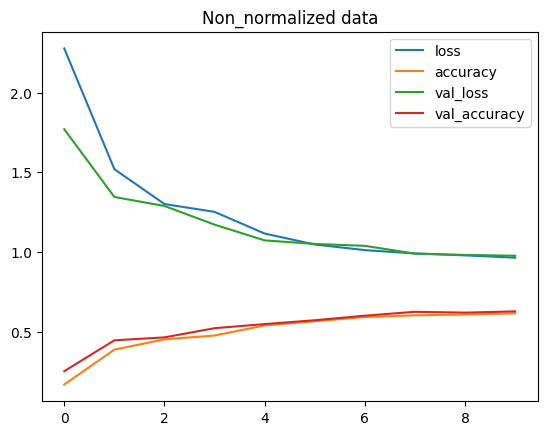

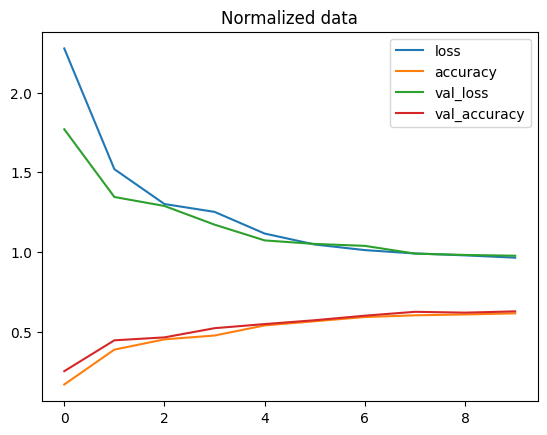

In [84]:
import pandas as pd
# Plot non-normalized data loss curves
pd.DataFrame(non_norm_history.history).plot(title="Non_normalized data")
# Plot normalized data loss curves
pd.DataFrame(non_norm_history.history).plot(title="Normalized data")

🔑 **Note:** The same model with even *slightly* different data can produce *dramatically* different results. So when you are comparing models, it's important to make sure you are comparing them on the same criteria (e.g. same architecture but different data or same data but different architecture).



## Finding the ideal learning rate

In [85]:
# Set random seed
tf.random.set_seed(42)

# Create model
model_13 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)),
    tf.keras.layers.Dense(6, activation="relu"),
    tf.keras.layers.Dense(6, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile model
model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# Fit the model
find_lr_history = model_13.fit(train_data_norm,
                               train_labels,
                               epochs=40,
                               validation_data=(test_data_norm, test_labels),
                               callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 6s 3ms/step - loss: 1.0454 - accuracy: 0.6090 - val_loss: 0.7007 - val_accuracy: 0.7457 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6433 - accuracy: 0.7742 - val_loss: 0.6440 - val_accuracy: 0.7810 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5937 - accuracy: 0.7933 - val_loss: 0.6012 - val_accuracy: 0.7876 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5391 - accuracy: 0.8148 - val_loss: 0.5561 - val_accuracy: 0.8076 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5100 - accuracy: 0.8259 - val_loss: 0.5431 - val_accuracy: 0.8130 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4981 - accuracy: 0.8270 - val_loss: 0.5592 - val_accuracy: 0.8050 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 8s

Text(0.5, 1.0, 'Finding the ideal learning rate')

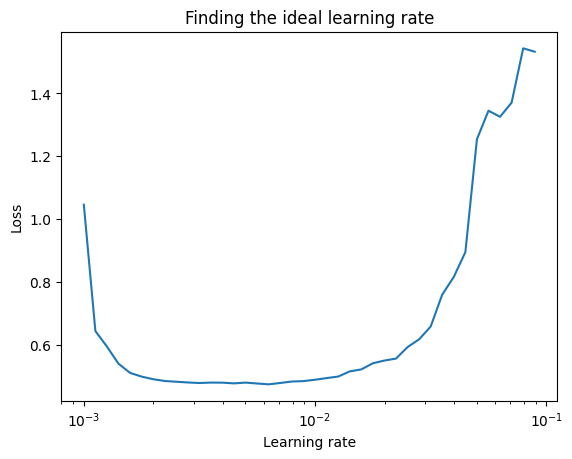

In [86]:
# Plot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate")

In [87]:
10**-3

0.001

In [88]:
# Let's refit a model with the ideal learning rate

# Set random seed
tf.random.set_seed(42)

# Create model
model_14 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(6, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile model
model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(lr=0.001),
                 metrics=["accuracy"])

# Fit the model
history_14 = model_14.fit(train_data_norm,
                          train_labels,
                          epochs=20,
                          validation_data=(test_data_norm, test_labels))

Epoch 1/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.9064 - accuracy: 0.6692 - val_loss: 0.6784 - val_accuracy: 0.7636
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6213 - accuracy: 0.7791 - val_loss: 0.6371 - val_accuracy: 0.7800
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5765 - accuracy: 0.7981 - val_loss: 0.5883 - val_accuracy: 0.7993
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5526 - accuracy: 0.8094 - val_loss: 0.5761 - val_accuracy: 0.8048
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5375 - accuracy: 0.8152 - val_loss: 0.5884 - val_accuracy: 0.7952
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5207 - accuracy: 0.8227 - val_loss: 0.5758 - val_accuracy: 0.8089
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5034 - accuracy: 0.8292 - val_loss: 0.5431 - val_accuracy:

## Evaluating our multi-class classification model

To evaluate our multi-class classification model we could:
* Evaluate its performance using other classification metrics (such as s confusion matrix)
* Assess some of its predictions (through visualizations)
* Improve its results (by training it for longer or changing the architecture)
* Save and export it for use in an application.

Let's go through the top 2....



In [89]:
# Create a confusion matrix
import itertools
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):
# Create the confusion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]   # normalize our confusion matrix
  n_classes = cm.shape[0]

  # Let's prettify it
  fig, ax = plt.subplots(figsize=figsize)
  # Create a matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  # Set labels to be classes
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
        xlabel="Predicted Label",
        ylabel="True Label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

  # Set x-axis labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Adjust label size
  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

# Set threshold for difference colors
  threshold = (cm.max() + cm.min())/ 2

# Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=text_size)

In [90]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [91]:
# Make some predictions with our model
y_probs = model_14.predict(test_data_norm)  #  probs is short for prediction probabilities

# View the first 5 predictions
y_probs[:5]

313/313 [==============================] - 1s 2ms/step


array([[5.4104463e-04, 2.8810660e-14, 1.5472311e-08, 7.0311296e-05,
        5.7411637e-07, 1.9536255e-01, 1.3875187e-02, 8.1810288e-02,
        8.4319264e-02, 6.2402064e-01],
       [3.3930287e-04, 7.5432887e-08, 9.0993738e-01, 9.6080655e-09,
        1.3186800e-02, 1.0658255e-18, 7.6444604e-02, 0.0000000e+00,
        9.1756221e-05, 8.6816431e-19],
       [8.3391700e-04, 9.9839312e-01, 5.6370971e-04, 9.3730523e-05,
        8.6915781e-05, 1.8605546e-14, 2.8555651e-05, 4.2359654e-18,
        2.6414944e-09, 2.9808631e-14],
       [4.1025423e-04, 9.9913466e-01, 3.3525034e-04, 5.1830069e-05,
        5.5853427e-05, 4.2307313e-16, 1.2187898e-05, 9.4877455e-21,
        2.5182204e-10, 6.5878236e-16],
       [1.2324202e-01, 1.7118693e-04, 3.0388582e-01, 1.9907277e-02,
        4.3270748e-02, 3.0441571e-09, 5.0675833e-01, 2.8417604e-21,
        2.7646488e-03, 7.1574582e-09]], dtype=float32)

> 🔑 **Note:** Remember to make predictions on the same kind of data your model was trained on (e.g. if your model was trained on normalized data, you will want to make predictions on normalized data)


In [92]:
y_probs[0]

array([5.4104463e-04, 2.8810660e-14, 1.5472311e-08, 7.0311296e-05,
       5.7411637e-07, 1.9536255e-01, 1.3875187e-02, 8.1810288e-02,
       8.4319264e-02, 6.2402064e-01], dtype=float32)

In [93]:
y_probs[0], tf.argmax(y_probs[0]), class_names[tf.argmax(y_probs[0])]

(array([5.4104463e-04, 2.8810660e-14, 1.5472311e-08, 7.0311296e-05,
        5.7411637e-07, 1.9536255e-01, 1.3875187e-02, 8.1810288e-02,
        8.4319264e-02, 6.2402064e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=9>,
 'Ankle boot')

In [94]:
# Convert all of the prediction probabilities into integers
y_preds = y_probs.argmax(axis=1)

# View the first 10 prediction labels
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [95]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [96]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
confusion_matrix(y_true=test_labels,
                 y_pred=y_preds)

array([[783,  13,  23,  67,   1,   0,  96,   0,  17,   0],
       [  4, 958,   9,  22,   4,   0,   1,   0,   2,   0],
       [ 30,   6, 723,  13, 148,   0,  72,   0,   8,   0],
       [ 32,  28,  21, 831,  37,   0,  44,   0,   6,   1],
       [  2,   3, 113,  24, 765,   0,  87,   0,   6,   0],
       [  1,   0,   0,   0,   0, 923,   1,  40,   7,  28],
       [148,   7, 111,  52, 125,   0, 530,   0,  27,   0],
       [  0,   0,   0,   0,   0,  46,   0, 928,   0,  26],
       [  4,   0,   9,  11,   2,   4,  23,   4, 942,   1],
       [  2,   0,   0,   0,   0,  24,   0,  47,   3, 924]])

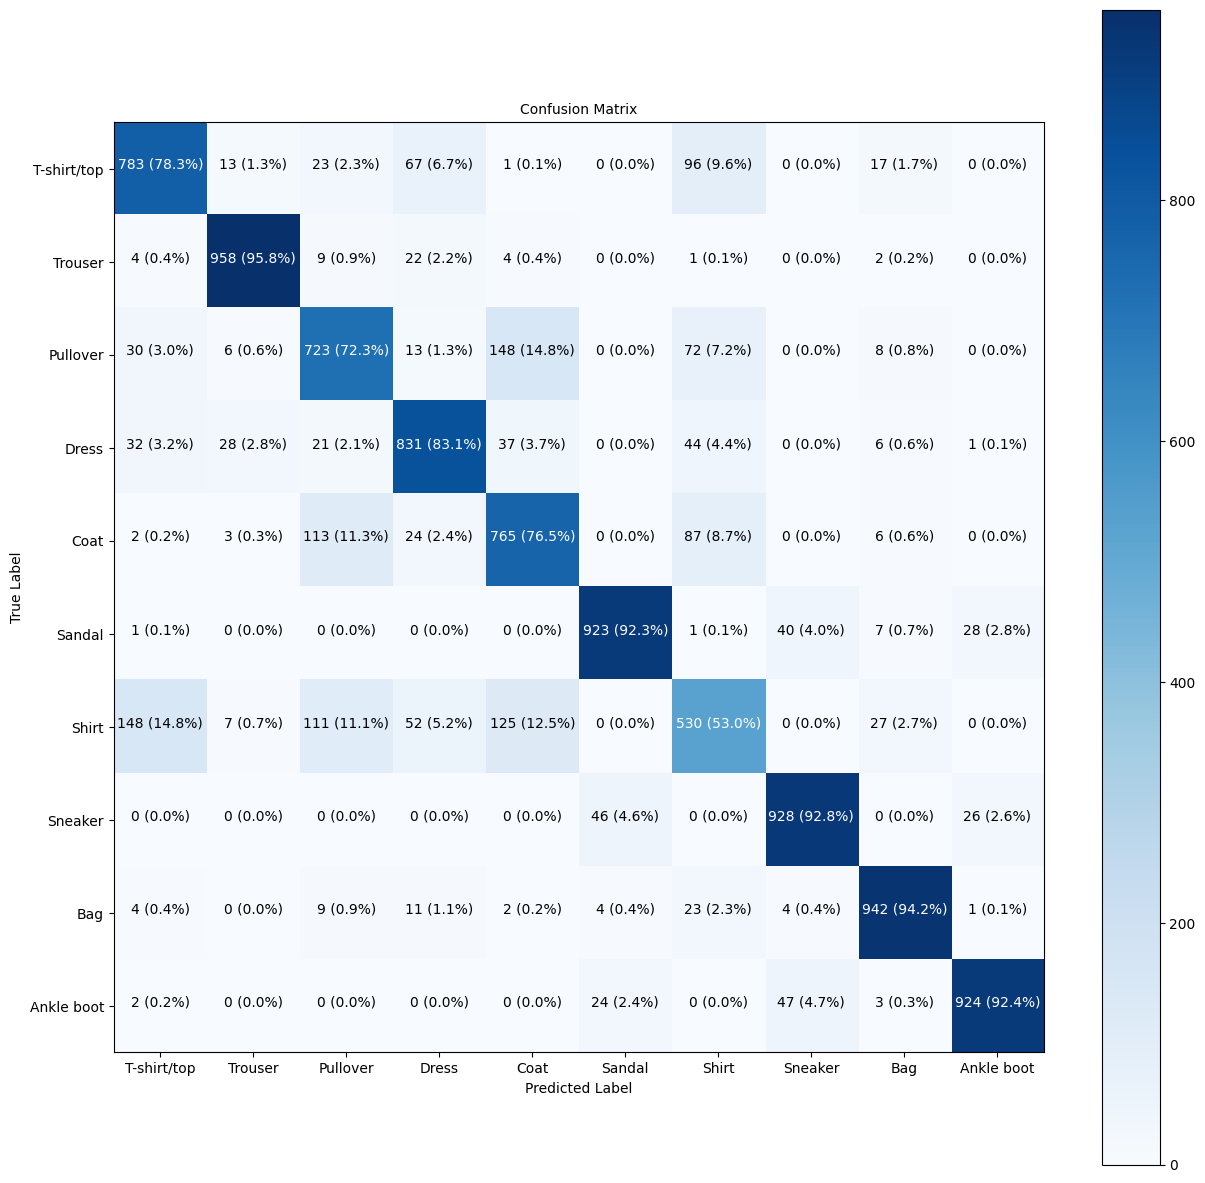

In [97]:
# Make a prettier confusion matrix
make_confusion_matrix(
    y_true=test_labels,
    y_pred=y_preds,
    classes=class_names,
    figsize=(15, 15),
    text_size=10,
)


🔑 **Note:** Often when working with images and other forms of data, it is good to visualize as much as possible to develop a further understanding of the data and the inputs and outputs of your models.

How about we create a fun little function for:
* Plot a random image
* Make a prediction on said image
* Label the plot with the truth label and the predicted label



In [98]:
import random
def plot_random_image(model, images, true_labels, classes):
  """
  Picks a random image, plots it and labels it with a prediction and truth label.
  """

  # Set up random integer
  i = random.randint(0, len(images))

  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

# Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                 100*tf.reduce_max(pred_probs),
                                                 true_label),
           color=color)  # set the color to green or red based on if prediction is right or wrong

1/1 [==============================] - 0s 24ms/step


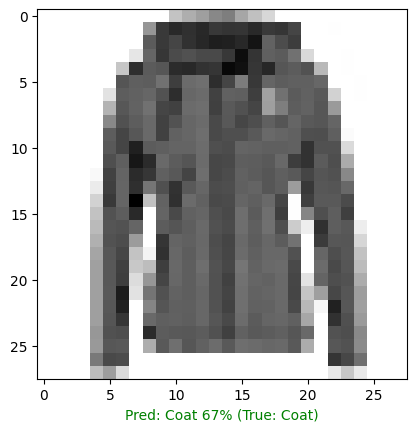

In [99]:
# Check out a random image as well as its prediction
plot_random_image(model=model_14,
                  images=test_data_norm,  # always make predictions on the same kind of data your model was trained on
                  true_labels=test_labels,
                  classes=class_names)

## What patterns is our model learning?


In [100]:
# Find layers of our most recent model
model_14.layers

In [101]:
# Extract a particular layer
model_14.layers[1]

In [103]:
# Get the patterns of a layer in our network
weights, biases = model_14.layers[1].get_weights()

# Shapes
weights, weights.shape

(array([[-0.0866632 , -0.76477146,  0.0850357 ,  0.46213627,  0.01910682,
          0.6878054 ],
        [ 0.15009096, -0.41818678, -0.08443168, -0.6490326 ,  0.40304092,
          0.58294094],
        [ 0.59207034, -0.40859   , -0.00693156, -0.25196162,  0.351205  ,
          0.6677418 ],
        ...,
        [ 0.16255678,  0.00269481, -0.0121517 , -0.19015418, -0.0259212 ,
          0.36552274],
        [-0.15817074,  0.25899664, -0.07570025, -0.4587131 , -0.3092661 ,
          0.27103457],
        [ 0.06830582, -0.08201772, -0.02590083, -0.07954361, -1.0027324 ,
          0.06443684]], dtype=float32),
 (784, 6))

In [104]:
28 * 28

784

In [105]:
model_14.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_38 (Dense)            (None, 6)                 4710      
                                                                 
 dense_39 (Dense)            (None, 6)                 42        
                                                                 
 dense_40 (Dense)            (None, 10)                70        
                                                                 
Total params: 4822 (18.84 KB)
Trainable params: 4822 (18.84 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Now let's check out the bias vector...



In [106]:
# Bias and biases shapes
biases, biases.shape

(array([ 0.69660074,  0.87592894, -0.01088673,  0.8917994 ,  1.9341427 ,
         1.2786376 ], dtype=float32),
 (6,))

Every neuron has a bias vector. Each of these is paired with a weights matrix.

The bias vector gets initialized as zeros (at least in the case of a TensorFlow Dense layer).

The bias vector dictates how much the patterns within the corresponding weights matrix should influence the next layer.




In [107]:
model_14.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_38 (Dense)            (None, 6)                 4710      
                                                                 
 dense_39 (Dense)            (None, 6)                 42        
                                                                 
 dense_40 (Dense)            (None, 10)                70        
                                                                 
Total params: 4822 (18.84 KB)
Trainable params: 4822 (18.84 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


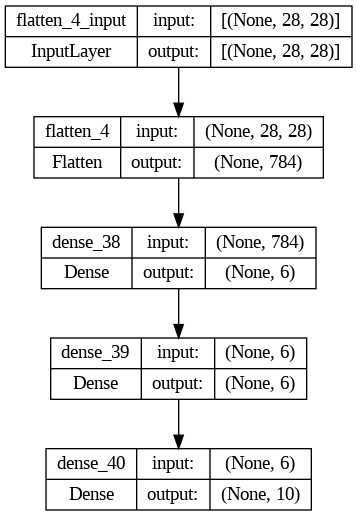

In [109]:
# Let's checkout another way of viewing our deep learning models
from tensorflow.keras.utils import plot_model
# See the inputs and outputs of each layer
plot_model(model_14, show_shapes=True)